Подключим необходимые библиотеки и загрузим наш датасет.  
Выведем его начало.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")
data = pd.read_csv("churn_dataset.csv")
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Посмотрим различную информацию о датасете. Судя по всему, это у нас какая-то компания, предоставляющая услуги связи.

In [2]:
data.shape

(3333, 20)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [4]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Нет ли в нашем датасете значений NULL, NaN или просто пропущенных?

In [5]:
data.isna().mean()

State                     0.0
Account length            0.0
Area code                 0.0
International plan        0.0
Voice mail plan           0.0
Number vmail messages     0.0
Total day minutes         0.0
Total day calls           0.0
Total day charge          0.0
Total eve minutes         0.0
Total eve calls           0.0
Total eve charge          0.0
Total night minutes       0.0
Total night calls         0.0
Total night charge        0.0
Total intl minutes        0.0
Total intl calls          0.0
Total intl charge         0.0
Customer service calls    0.0
Churn                     0.0
dtype: float64

Проверим, сколько штатов у нас в списке, и нет ли каких-то некорректных значений.

In [6]:
data['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

Ничего подозрительного. Проверим, нет ли чего-то некорректного в строковых данных в некоторых столбцах.

In [7]:
data['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
data['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
data['Churn'].unique()

array([False,  True])

Тоже всё в порядке. Теперь проверим числовые данные. 
Здравый смысл подсказывает, что они могут быть какими угодно, но точно не должны быть меньше нуля.

In [10]:
for column in data.drop(["State", "International plan", "Voice mail plan"], axis=1).columns:
    print(data[data[column] < 0])

Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []
Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []
Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, 

Снова ничего интересного.  
Признак оттока клиентов лучше привести к числовому виду (1 - ушедшие, 0 - оставшиеся).

In [11]:
data["Churn"] = data["Churn"].astype(int)
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Построим гистограмму

array([[<AxesSubplot:title={'center':'Account length'}>,
        <AxesSubplot:title={'center':'Area code'}>,
        <AxesSubplot:title={'center':'Number vmail messages'}>,
        <AxesSubplot:title={'center':'Total day minutes'}>],
       [<AxesSubplot:title={'center':'Total day calls'}>,
        <AxesSubplot:title={'center':'Total day charge'}>,
        <AxesSubplot:title={'center':'Total eve minutes'}>,
        <AxesSubplot:title={'center':'Total eve calls'}>],
       [<AxesSubplot:title={'center':'Total eve charge'}>,
        <AxesSubplot:title={'center':'Total night minutes'}>,
        <AxesSubplot:title={'center':'Total night calls'}>,
        <AxesSubplot:title={'center':'Total night charge'}>],
       [<AxesSubplot:title={'center':'Total intl minutes'}>,
        <AxesSubplot:title={'center':'Total intl calls'}>,
        <AxesSubplot:title={'center':'Total intl charge'}>,
        <AxesSubplot:title={'center':'Customer service calls'}>],
       [<AxesSubplot:title={'center':'Chu

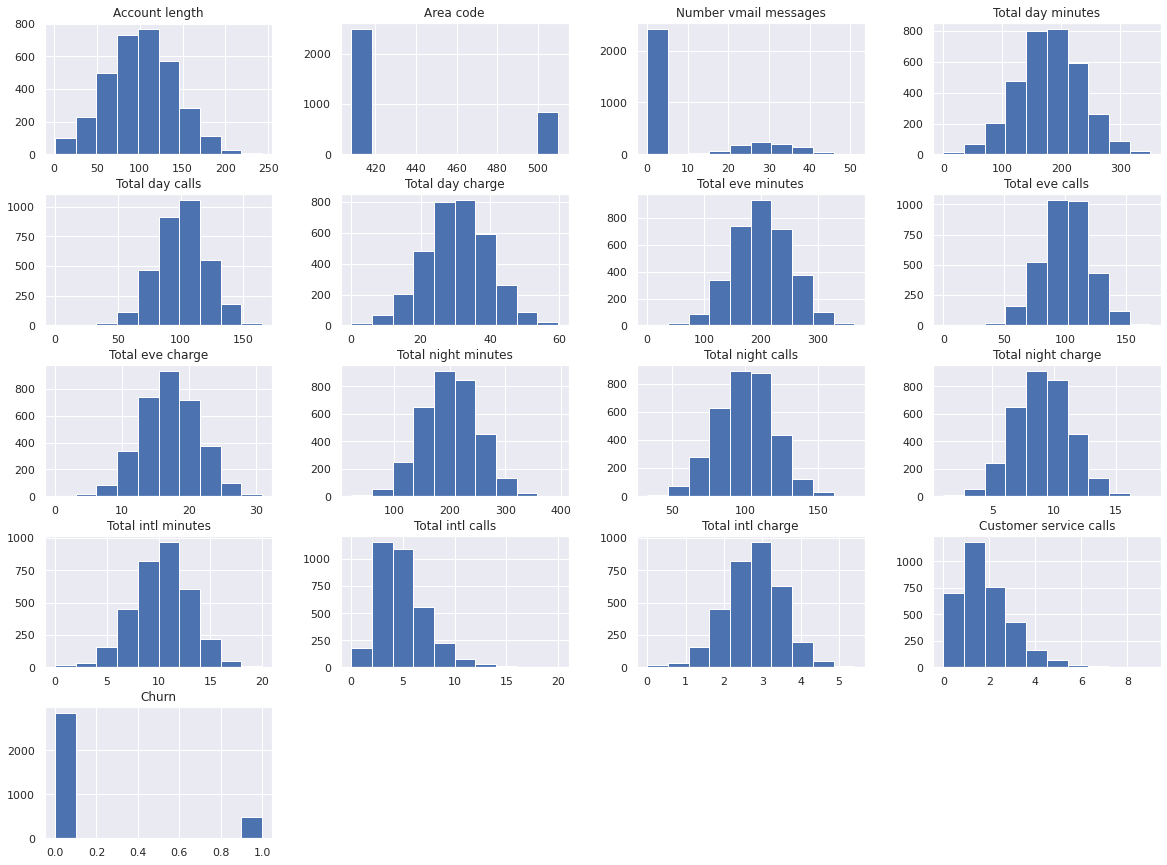

In [12]:
data.hist(figsize=(20, 15))

Имеет смысл построить таблицу корреляции, оформив её в тепловую карту.

<AxesSubplot:>

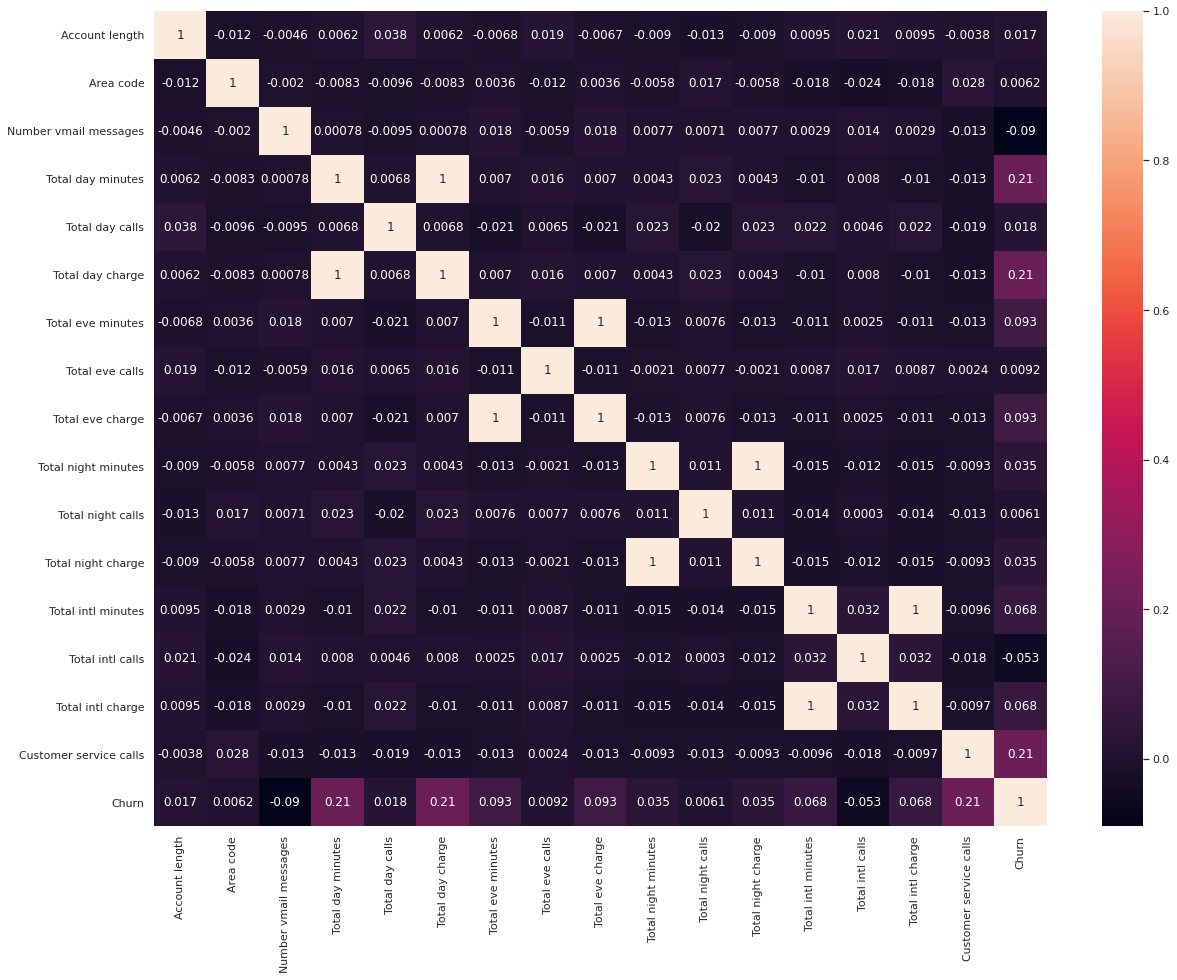

In [13]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True)

Сильных корреляций нет.

Попробуем посмотреть, есть ли какие-то зависимости от штатов.

In [14]:
one_hot = pd.get_dummies(data['State'])
data_one_hot = data.drop('State',axis = 1)
data_one_hot = data.join(one_hot)

<AxesSubplot:>

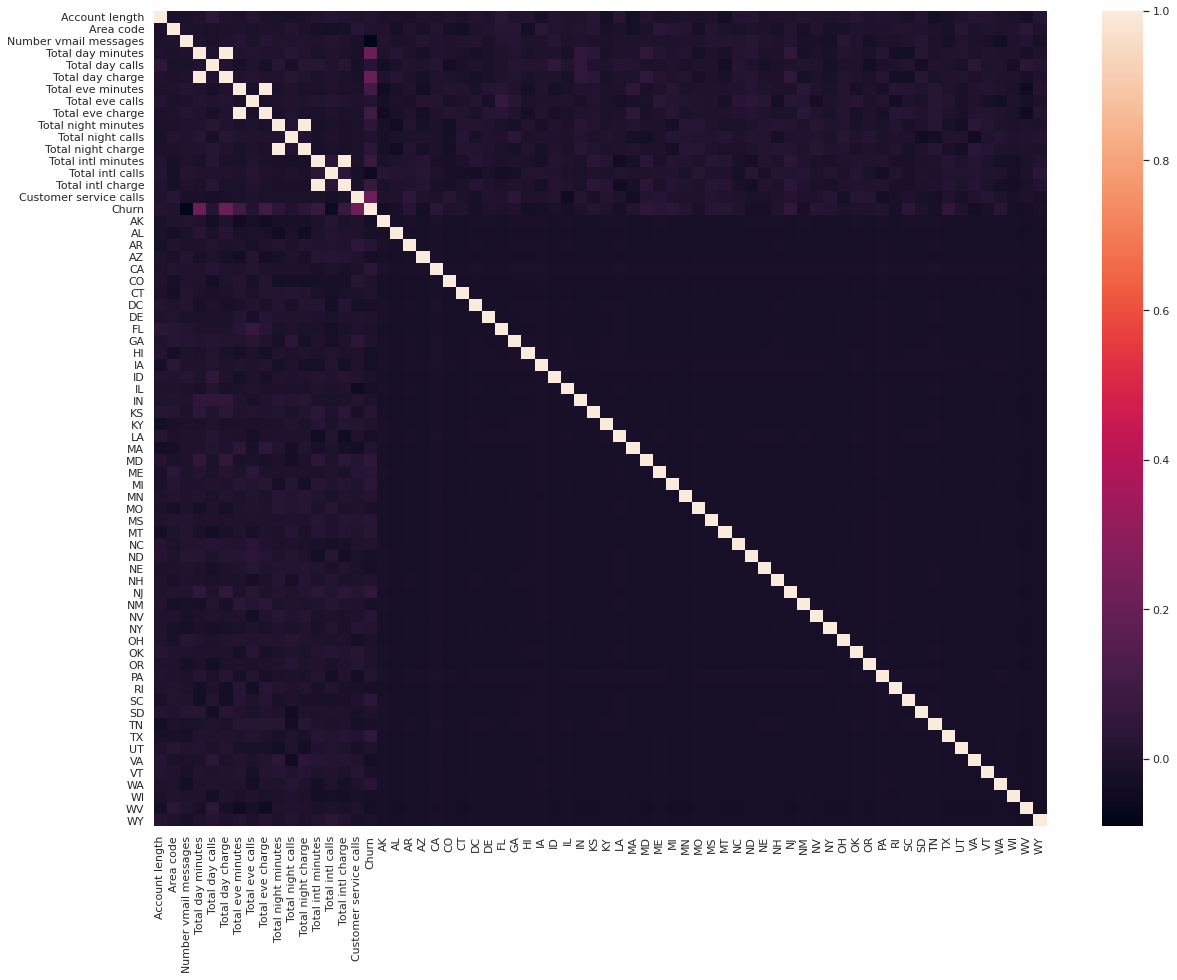

In [15]:
plt.figure(figsize=(20, 15))
sns.heatmap(data_one_hot.corr())

Снова нет сильных корреляций.

Что ж, посмотрим, что с ушедшими клиентами. Как они распределены? Есть ли у них какие-то зависимости, корреляции?

In [16]:
CHURN = data[data["Churn"] == 1]

In [17]:
CHURN.shape

(483, 20)

array([[<AxesSubplot:title={'center':'Account length'}>,
        <AxesSubplot:title={'center':'Area code'}>,
        <AxesSubplot:title={'center':'Number vmail messages'}>,
        <AxesSubplot:title={'center':'Total day minutes'}>],
       [<AxesSubplot:title={'center':'Total day calls'}>,
        <AxesSubplot:title={'center':'Total day charge'}>,
        <AxesSubplot:title={'center':'Total eve minutes'}>,
        <AxesSubplot:title={'center':'Total eve calls'}>],
       [<AxesSubplot:title={'center':'Total eve charge'}>,
        <AxesSubplot:title={'center':'Total night minutes'}>,
        <AxesSubplot:title={'center':'Total night calls'}>,
        <AxesSubplot:title={'center':'Total night charge'}>],
       [<AxesSubplot:title={'center':'Total intl minutes'}>,
        <AxesSubplot:title={'center':'Total intl calls'}>,
        <AxesSubplot:title={'center':'Total intl charge'}>,
        <AxesSubplot:title={'center':'Customer service calls'}>],
       [<AxesSubplot:title={'center':'Chu

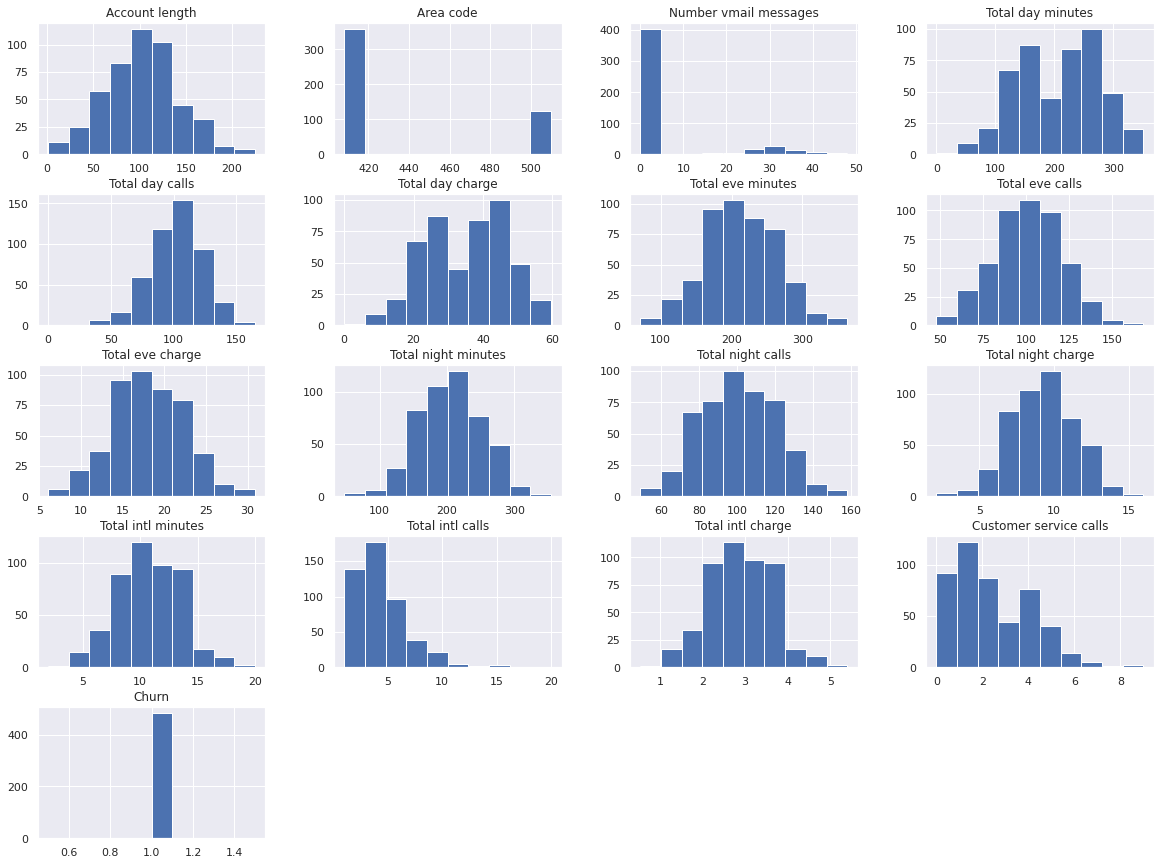

In [18]:
CHURN.hist(figsize=(20, 15))

<AxesSubplot:>

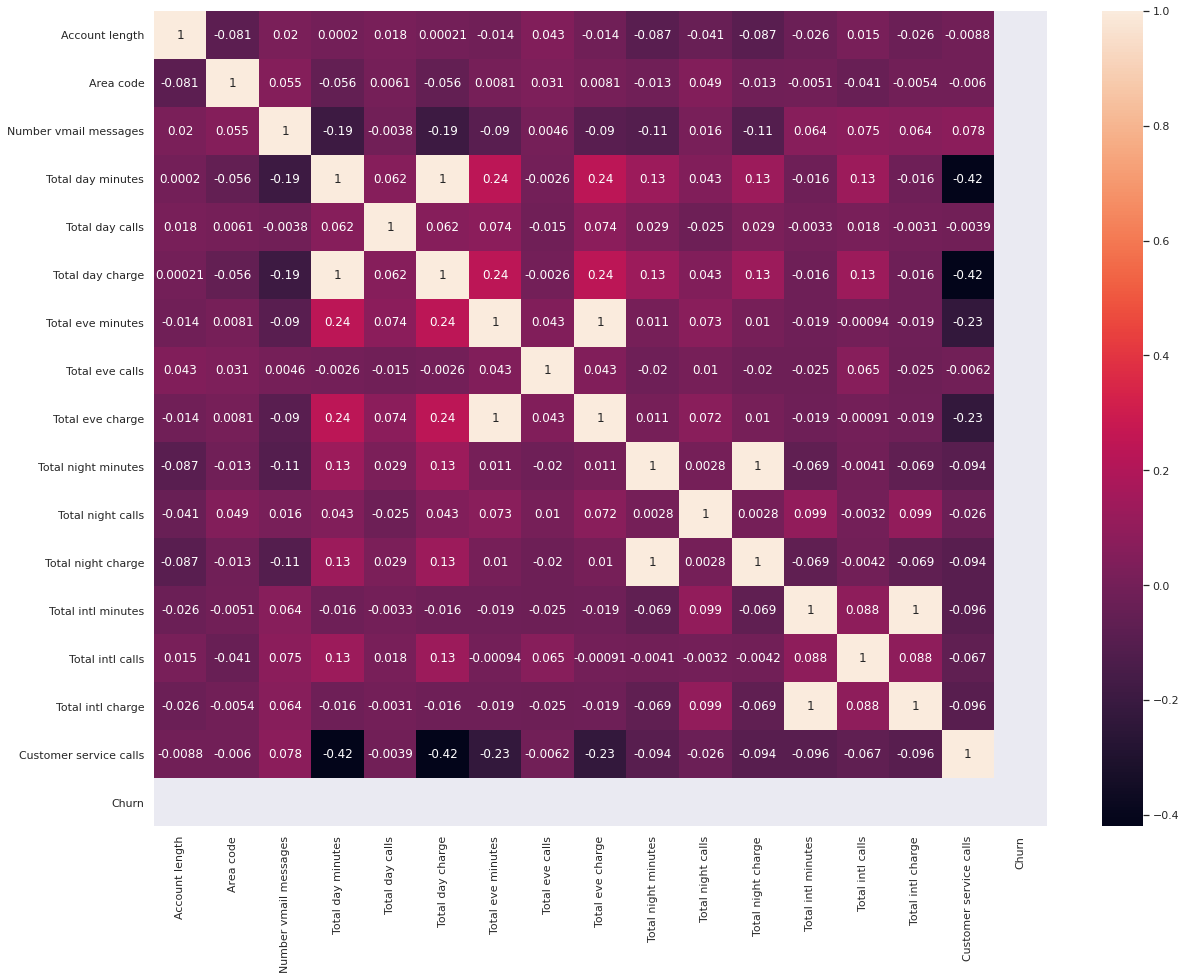

In [19]:
plt.figure(figsize=(20, 15))
sns.heatmap(CHURN.corr(), annot=True)

Сильных корреляций снова нет. Интересно, а чем отличаются оставшиеся клиенты от ушедших?

array([[<AxesSubplot:title={'center':'Account length'}>,
        <AxesSubplot:title={'center':'Area code'}>,
        <AxesSubplot:title={'center':'Number vmail messages'}>,
        <AxesSubplot:title={'center':'Total day minutes'}>],
       [<AxesSubplot:title={'center':'Total day calls'}>,
        <AxesSubplot:title={'center':'Total day charge'}>,
        <AxesSubplot:title={'center':'Total eve minutes'}>,
        <AxesSubplot:title={'center':'Total eve calls'}>],
       [<AxesSubplot:title={'center':'Total eve charge'}>,
        <AxesSubplot:title={'center':'Total night minutes'}>,
        <AxesSubplot:title={'center':'Total night calls'}>,
        <AxesSubplot:title={'center':'Total night charge'}>],
       [<AxesSubplot:title={'center':'Total intl minutes'}>,
        <AxesSubplot:title={'center':'Total intl calls'}>,
        <AxesSubplot:title={'center':'Total intl charge'}>,
        <AxesSubplot:title={'center':'Customer service calls'}>],
       [<AxesSubplot:title={'center':'Chu

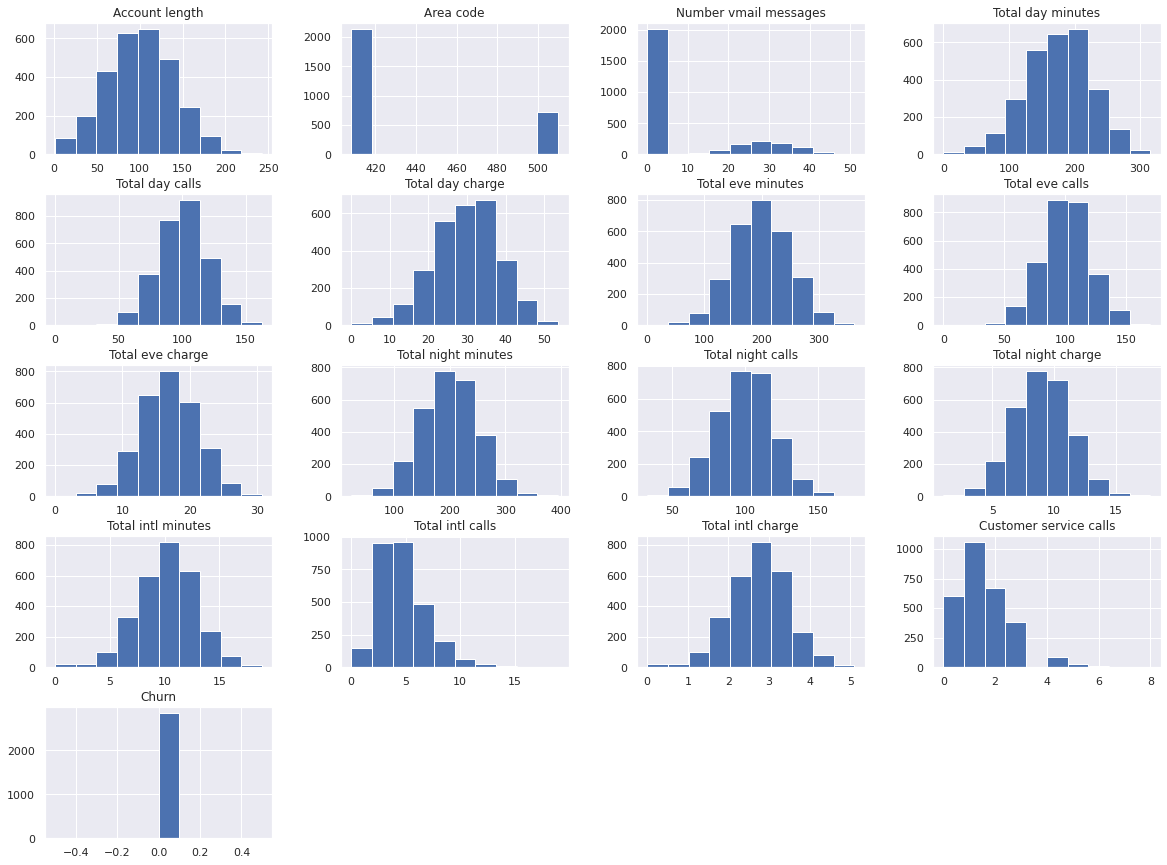

In [20]:
nochurn = data[data["Churn"] == 0]
nochurn.hist(figsize=(20, 15))

### Выводы

По приведённым гистограммам видно, что ушедшие клиенты в целом разговаривали днём больше, чем оставшиеся, а также чаще обращались в техподдержку. Из этого можно сделать несколько предположений:  
1. Возможно, клиентам нужна более дешёвая связь, так как они дольше разговаривают
2. Возможно, у клиентов часто бывают проблемы со связью, так как они чаще звонят в техподдержку
3. Возможно, клиентам не нравится обслуживание в техподдержке

Исходя из этих возможных факторов оттока, я выдвигаю следующие рациональные предложения:
1. Разработать новые тарифные планы или дополнительные пакеты с более низкой стоимостью и увеличенным количеством минут - так одна минута разговора будет стоить дешевле
2. Проанализировать качество связи и прочих предоставляемых компанией услуг в целом: узнать, на что ушедшие клиенты жаловались чаще всего и улучшить эти стороны
3. Обратить внимание на качество работы техподдержки: проанализировать записи разговоров и переписок с клиентами. Возможно, по итогам проверки и анализа следует ввести индивидуальные коэффициенты эффективности для сотрудников техподдежки и принять меры для повышения этой эффективности. Например, сотрудников с высоким коэффициентом стоит премировать или поощрить каким-либо иным способом, с низким же - депремировать либо уволить.

Также не стоит забывать, что есть определённая доля клиентов, уходящих по независящим от компании причинам. Безусловно, я нахожу приведённые выше предложения эффективными, но не стоит забывать и о:  

4. Реклама. Необходима реклама всех новых услуг и тарифов, желательно, таргетированная и персонифицированная. Стоит разработать рекламную кампанию и запустить её в наиболее эффективном сегменте, будь то социальные сети, телевизор или газеты.

P.S. Особых проблем в проанализированном датасете не обнаружено. Мелкие замечания:  
1. В списке признаков и в самом датасете признаки называются немного по-разному, например "international_plan" и "International plan". Как видно, есть разница в написании с заглавной буквы и знаках нижнего подчёркивания, что поналалу немного осложнило анализ
2. Некоторые признаки в датасете (например, бинарные) желательно изначально приводить к полностью численному виду для большего удобства обработки датасета.